# Heat Maps

In a sense, heat maps are just a prettier version of the PTSH above. However, they are also a more condensed, information-rich, and efficient version of the PSTHs, because rather than needing 10 plots to show the histograms for all levels of intensity, we can do so in a single plot. Heat maps essentially allow us to plot 3 dimensions rather than only two; we have the *x* and *y* axes, but then we can plot a third variable (dimension) using colour (or intensity of colour). Think of it the above plot rotated in a plane, so that if before, you were looking at the plot from the side, now you're looking at it from above. More intense colours indicate a higher spike probability at that time point. 

First we'll load the necessary packages, and the data:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

with open('ten_intensities.pkl', 'rb') as handle:
    ten_intensities = pickle.load(handle, encoding='latin1')

To make it easy to plot the heat map using Matplotlib's `ax.imshow()` function, we combine all the data from the `ten_intensities` data set into a dictionary whose keys are the intensity levels, and values are the histograms (spike probabilities):

In [13]:
psth_dict = {}
num_intensities = len(ten_intensities)

for key in ten_intensities.keys():

    spike_times = [a for b in ten_intensities[key] for a in b] 
    
    spike_count, bins = np.histogram(spike_times, bins=range(20))
    psth_dict[float(key[0])] = spike_count / 10

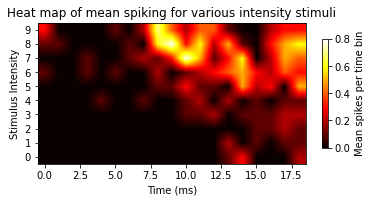

In [14]:
fig = plt.figure()
ax = plt.subplot(111)
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               origin='lower',
               cmap='hot', 
               interpolation='bilinear')

# make pretty
plt.yticks([x for x in range(10)],[str(x) for x in range(10)])
plt.ylabel('Stimulus Intensity')
plt.xlabel('Time (ms)')
plt.title('Heat map of mean spiking for various intensity stimuli')
cb = fig.colorbar(aa, shrink=0.5) 
cb.ax.set_ylabel('Mean spikes per time bin')

plt.show()

For better or for worse, a consequence of the heat map representation is that it takes data that were measured at discrete levels of stimulus intensity, and interpolates between those levels to provide a smoothed representation of the data. In other words, it's filling in what the values would be in between the tested levels of stimulus intensity. 

Below are examples showing different colourmaps and interpolation methods. Blinear and bicubic are smoothed forms of interpolation, where nearest-neighbour looks "blocky" because it's plotting the actual values with no interpolation, more consistent with the actual data. 

This is not to imply that interpolation is invalid; indeed it's a valuable tool. But it's important to be aware of interpolation and consider what effects it might have in some situations. On the one hand, interpolation can make predictions and also reduce noise in the data. On the other hand, if there are big gaps in your data it may note be appropriate to interpolate, because interpolation makes certain assumptions about the shape (distribution) of your data. 

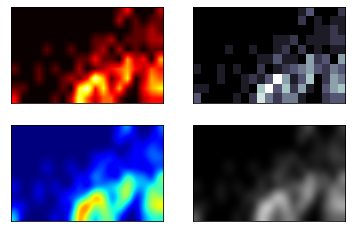

In [9]:
fig = plt.figure()

ax = plt.subplot(221)
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               cmap='hot',interpolation='bilinear',aspect=1.2) 
plt.yticks([]); plt.xticks([])

ax = plt.subplot(222)
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               cmap='bone', interpolation='nearest',aspect=1.2) 
plt.yticks([]); plt.xticks([])

ax = plt.subplot(223);
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               cmap='jet', interpolation='bicubic',aspect=1.2) 
plt.yticks([]); plt.xticks([])

ax = plt.subplot(224)
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               cmap='gray', interpolation='bicubic',aspect=1.2)
plt.yticks([]); plt.xticks([])

plt.show()

### Colour Map Choices

One final comment about the heat maps above: your choice of colour map (`cmap`) matters. One way to choose a colour map is based on one's individual intuitions about aesthetics. For example, I personally think the top left one (`cmap='hot'`) is the nicest. However, it's important to consider the neuroscience of how humans interpret colour. Even though the colour spectrum is continuous (wavelengths of electromagnetic radiation ranging from approximately 400–700 nm), we see it as distinct colours (classically, red, orange, yellow, green, blue, indigo, and violet). Although we can discriminate different hues within each of those colours, we nonetheless see colours categorically. In other words, two equally-different values at different parts of the colour range may not be perceived as the same magnitude of difference. For example in the bottom left (`cmap='jet'`) the green areas seem to 'pop' relative to the blue, and there is a patch of orange that really stands out. Likewise in the top left (hot) map, the is a distinctive patch of bright yellow. However, when we look at the bottom right (greyscale) plot, we see that the values are actually continuous; the same areas are still the most intense, but our brains more naturally see the continuous nature of the data. This is a truer representation of the data, than a colour map that leads to the perception of distinct patches in what is actually continuous data.

Another issue with some colour maps are that they are not always **isoluminent**, meaning that the luminence (brightness) of some colours may be greater than others, again making some differences appear larger than others.

A final issue is that a non-negligible proportion of the population has some form of colourblindness. This can range from mild forms (common) to complete achromatopsia (rare). In fact, it is estimated that 8% of males (1 in 12) have some form of colourblindness; colourblindness is caused by a recessive gene on the X chromosome, so it is far less common for females to have it. So if you anticipate that, say, even 50 people view a graph you make, the odds are that 2 or more of them will have some form of colourblindness. By the way, there is a great app that simulates different forms of colourblindness on your computer, called [Color Oracle](https://colororacle.org) — it's worth checking out! 

In other words, choosing the wrong colour map can mislead viewers in interpreting the data, and may also result in your plots being uninterpretable by some viewers. You should pick a colour map that is **perceptually uniform** (e.g., nearby values have similar-appearing colours across the range), and robust to colourblindness. An excellent choice is one of the [viridis](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html) family of colourmaps, which were explicitly designed to have these properties, and also be aesthetically appealing. The viridis family is used below:

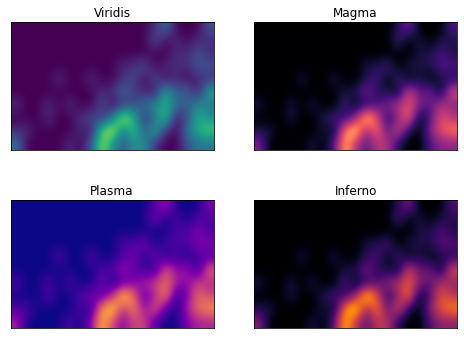

In [10]:
fig = plt.figure(figsize=[8,6])

ax = plt.subplot(221)
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               cmap='viridis',interpolation='bicubic',aspect=1.2) 
ax.set_title("Viridis")
plt.yticks([]); plt.xticks([])

ax = plt.subplot(222)
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               cmap='magma', interpolation='bicubic',aspect=1.2) 
ax.set_title("Magma")
plt.yticks([]); plt.xticks([])

ax = plt.subplot(223);
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               cmap='plasma', interpolation='bicubic',aspect=1.2) 
ax.set_title("Plasma")
plt.yticks([]); plt.xticks([])

ax = plt.subplot(224)
aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],
               cmap='inferno', interpolation='bicubic',aspect=1.2)
ax.set_title("Inferno")
plt.yticks([]); plt.xticks([])

plt.show()

Compare these plots to the ones above that used non-viridis colourmaps (re-generated below, but with the code condensed to save space) and ask yourself how your perception and interpretation of the plots changes between them. 

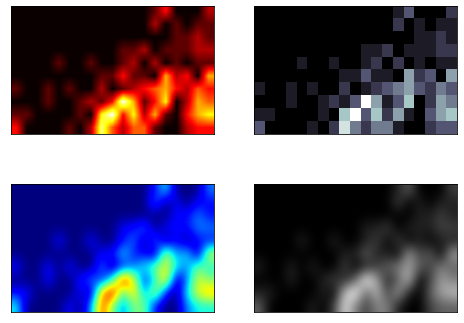

In [11]:
fig = plt.figure(figsize=[8,6])
ax = plt.subplot(221);aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],cmap='hot',interpolation='bilinear',aspect=1.2) ; plt.yticks([]); plt.xticks([])
ax = plt.subplot(222);aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],cmap='bone', interpolation='nearest',aspect=1.2) ;plt.yticks([]); plt.xticks([])
ax = plt.subplot(223);aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],cmap='jet', interpolation='bicubic',aspect=1.2) ;plt.yticks([]); plt.xticks([])
ax = plt.subplot(224);aa = ax.imshow([psth_dict[i] for i in sorted(psth_dict.keys())],cmap='gray', interpolation='bicubic',aspect=1.2);plt.yticks([]); plt.xticks([])
plt.show()